## TASK 1

##### GOVIND MADHUSUDAN HARAYAN

In [25]:
#import libraries
import pandas as pd  #(Data Analytical Library)
import numpy as np   #(Fast linear algebra library)
import matplotlib.pyplot as plt  #(visualisaton)
import seaborn as sns #(Statitistical Viz)

In [26]:
#Load dataset
df = pd.read_csv("dataset.csv")

In [27]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Data pre-processing

In [28]:
df.info() # Dataframe summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [29]:
df.describe() #Data summary

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Checking for missing values

In [30]:
df.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [31]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

- No missing values

## EDA

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

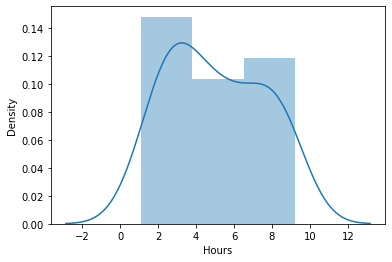

In [32]:
sns.distplot(a=df["Hours"])

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

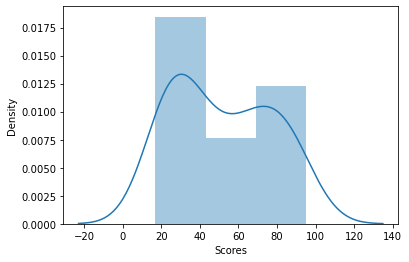

In [33]:
sns.distplot(a=df["Scores"])

<AxesSubplot:ylabel='Scores'>

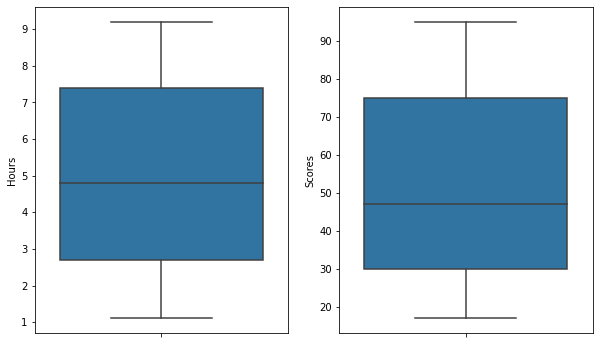

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(10,6))
sns.boxplot(y="Hours", data=df, orient='v', ax=axes[0])
sns.boxplot(y="Scores", data=df, orient='v', ax=axes[1] )

- No outliers present

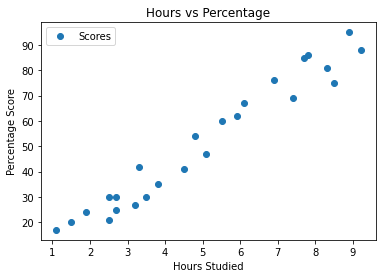

In [35]:
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

- There is a positive linear relation between number of hours studies and persentage of marks scored.

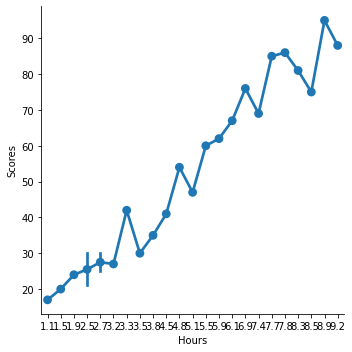

In [36]:
sns.catplot(data=df,x='Hours',y='Scores',kind='point')

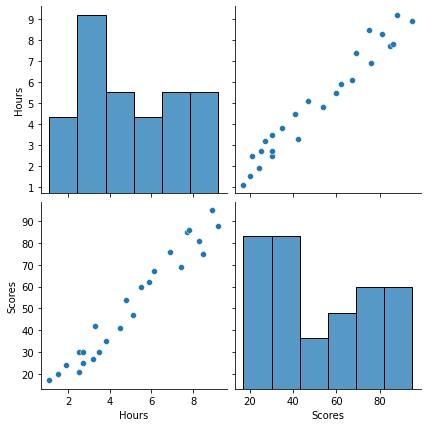

In [37]:
sns.pairplot(df,height=3)

<AxesSubplot:>

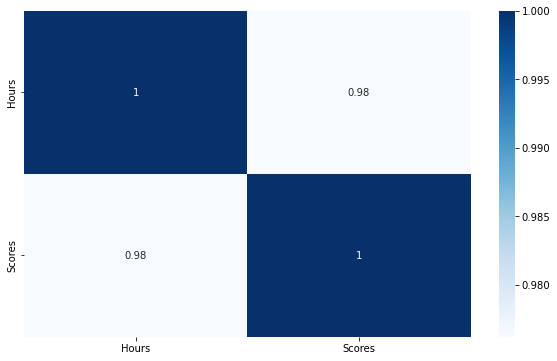

In [38]:
fig = plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), cmap='Blues', annot = True)

Conclusions
- No missing values 
- Positive liner relation between number of hours of studies and precentage of marks scored.
- High correlation between the variables

# Linear Regression Model

#### Storing independent and target variables in X and y

In [39]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

#### Splitting dataset into train and test

In [40]:
#train test split
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

#### Training Linear Regression Model

In [41]:
#Training the model
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(X_train, y_train) 


LinearRegression()

In [42]:
model.score(X_test, y_test)

0.9454906892105354

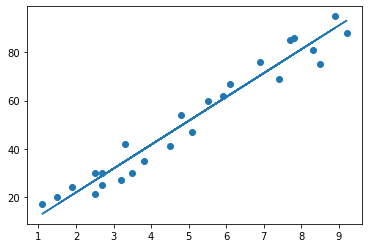

In [43]:
# Plotting the regression line
line = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [44]:
#making predictions
print(X_test) 
y_pred = model.predict(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [45]:
# Comparing Actual vs Predicted
df_res = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df_res 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### What will be predicted score if a student studies for 9.25hrs/day ?

In [46]:
hours = 9.25
own_pred = model.predict([[hours]])
print("No of Hours = ", hours)
print("Predicted Score = ",own_pred)

No of Hours =  9.25
Predicted Score =  [93.69173249]


## Evaluating Model

In [47]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
